In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir(r"/Users/yeji/SWING 2023 해커톤 with LONDON/전처리데이터")
천식대기_df = pd.read_csv("천식+대기오염지수.csv", engine="python")

In [3]:
천식대기_df

,Unnamed: 0,요양개시년월,주소(시도),주소(시군구),연령군,진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
0,0,201001,서울특별시,강남구,0,442,26,63,0.8,0.008,0.050,0.007
1,1,201001,서울특별시,강남구,1,220,26,63,0.8,0.008,0.050,0.007
2,2,201001,서울특별시,강남구,2,75,26,63,0.8,0.008,0.050,0.007
3,3,201001,서울특별시,강남구,3,491,26,63,0.8,0.008,0.050,0.007
4,4,201001,서울특별시,강남구,4,438,26,63,0.8,0.008,0.050,0.007
...,...,...,...,...,...,...,...,...,...,...,...,...
21595,21595,202112,서울특별시,중랑구,1,45,21,38,0.5,0.014,0.031,0.003
21596,21596,202112,서울특별시,중랑구,2,24,21,38,0.5,0.014,0.031,0.003
21597,21597,202112,서울특별시,중랑구,3,262,21,38,0.5,0.014,0.031,0.003
21598,21598,202112,서울특별시,중랑구,4,330,21,38,0.5,0.014,0.031,0.003


# 전체 연령대 천식과 대기오염지수의 상관관계

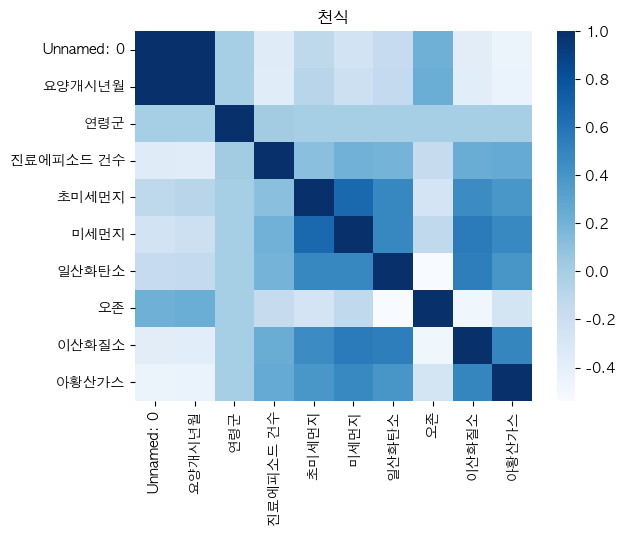

In [4]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False


# pandas의 ".corr"을 사용하여 상관계수 계산(numeric_only 인수를 명시하지 않았을 때 경고 메시지가 발생하여 numeric_only를 설정함.)
cor = 천식대기_df.corr(numeric_only=True)      
# seaborn heatmap을 사용하여 시각화(colormap = blue, 수치를 표시하지 않는 annot = false로 설정함.)  
sns.heatmap(cor, annot = False, cmap=plt.cm.Blues)  
plt.title('천식')
plt.show()

In [5]:
cor_target_abs0 = abs(cor['진료에피소드 건수']).sort_values(ascending=False)
print(cor_target_abs0)

진료에피소드 건수     1.000000
요양개시년월        0.358811
Unnamed: 0    0.357185
아황산가스         0.260584
이산화질소         0.237881
미세먼지          0.207837
일산화탄소         0.194285
오존            0.155841
초미세먼지         0.110594
연령군           0.014411
Name: 진료에피소드 건수, dtype: float64


## 연령군 0

In [12]:
df_0 = 천식대기_df.query('연령군 == 0')

In [13]:
df_0

,요양개시년월,주소(시도),주소(시군구),연령군,진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
0,201001,서울특별시,강남구,0,442,26,63,0.8,0.008,0.050,0.007
6,201001,서울특별시,강동구,0,516,27,49,0.5,0.010,0.040,0.010
12,201001,서울특별시,강북구,0,343,22,54,0.9,0.015,0.049,0.010
18,201001,서울특별시,강서구,0,981,27,62,0.8,0.010,0.048,0.009
24,201001,서울특별시,관악구,0,518,19,64,0.9,0.009,0.044,0.006
...,...,...,...,...,...,...,...,...,...,...,...
21570,202112,서울특별시,용산구,0,55,23,38,0.5,0.012,0.029,0.003
21576,202112,서울특별시,은평구,0,311,23,36,0.7,0.013,0.027,0.004
21582,202112,서울특별시,종로구,0,28,25,39,0.6,0.014,0.031,0.003
21588,202112,서울특별시,중구,0,59,24,38,0.6,0.014,0.033,0.004


In [14]:
df_0 = df_0.drop(['연령군'], axis=1)

In [15]:
df_0

,요양개시년월,주소(시도),주소(시군구),진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
0,201001,서울특별시,강남구,442,26,63,0.8,0.008,0.050,0.007
6,201001,서울특별시,강동구,516,27,49,0.5,0.010,0.040,0.010
12,201001,서울특별시,강북구,343,22,54,0.9,0.015,0.049,0.010
18,201001,서울특별시,강서구,981,27,62,0.8,0.010,0.048,0.009
24,201001,서울특별시,관악구,518,19,64,0.9,0.009,0.044,0.006
...,...,...,...,...,...,...,...,...,...,...
21570,202112,서울특별시,용산구,55,23,38,0.5,0.012,0.029,0.003
21576,202112,서울특별시,은평구,311,23,36,0.7,0.013,0.027,0.004
21582,202112,서울특별시,종로구,28,25,39,0.6,0.014,0.031,0.003
21588,202112,서울특별시,중구,59,24,38,0.6,0.014,0.033,0.004


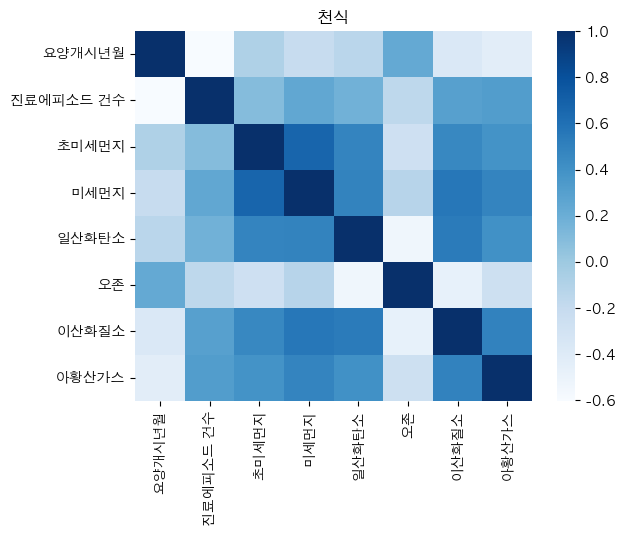

In [16]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False


# pandas의 ".corr"을 사용하여 상관계수 계산(numeric_only 인수를 명시하지 않았을 때 경고 메시지가 발생하여 numeric_only를 설정함.)
cor = df_0.corr(numeric_only=True)      
# seaborn heatmap을 사용하여 시각화(colormap = blue, 수치를 표시하지 않는 annot = false로 설정함.)  
sns.heatmap(cor, annot = False, cmap=plt.cm.Blues)  
plt.title('천식')
plt.show()

In [17]:
cor_target_abs0 = abs(cor['진료에피소드 건수']).sort_values(ascending=False)
print(cor_target_abs0)

진료에피소드 건수    1.000000
요양개시년월       0.602806
아황산가스        0.320071
이산화질소        0.293096
미세먼지         0.244719
일산화탄소        0.179593
오존           0.158418
초미세먼지        0.093282
Name: 진료에피소드 건수, dtype: float64


## 연령군 1

In [18]:
df_1 = 천식대기_df.query('연령군 == 1')
df_1

,요양개시년월,주소(시도),주소(시군구),연령군,진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
1,201001,서울특별시,강남구,1,220,26,63,0.8,0.008,0.050,0.007
7,201001,서울특별시,강동구,1,205,27,49,0.5,0.010,0.040,0.010
13,201001,서울특별시,강북구,1,141,22,54,0.9,0.015,0.049,0.010
19,201001,서울특별시,강서구,1,338,27,62,0.8,0.010,0.048,0.009
25,201001,서울특별시,관악구,1,214,19,64,0.9,0.009,0.044,0.006
...,...,...,...,...,...,...,...,...,...,...,...
21571,202112,서울특별시,용산구,1,27,23,38,0.5,0.012,0.029,0.003
21577,202112,서울특별시,은평구,1,130,23,36,0.7,0.013,0.027,0.004
21583,202112,서울특별시,종로구,1,11,25,39,0.6,0.014,0.031,0.003
21589,202112,서울특별시,중구,1,16,24,38,0.6,0.014,0.033,0.004


In [19]:
df_1 = df_1.drop(['연령군'], axis=1)

In [20]:
df_1

,요양개시년월,주소(시도),주소(시군구),진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
1,201001,서울특별시,강남구,220,26,63,0.8,0.008,0.050,0.007
7,201001,서울특별시,강동구,205,27,49,0.5,0.010,0.040,0.010
13,201001,서울특별시,강북구,141,22,54,0.9,0.015,0.049,0.010
19,201001,서울특별시,강서구,338,27,62,0.8,0.010,0.048,0.009
25,201001,서울특별시,관악구,214,19,64,0.9,0.009,0.044,0.006
...,...,...,...,...,...,...,...,...,...,...
21571,202112,서울특별시,용산구,27,23,38,0.5,0.012,0.029,0.003
21577,202112,서울특별시,은평구,130,23,36,0.7,0.013,0.027,0.004
21583,202112,서울특별시,종로구,11,25,39,0.6,0.014,0.031,0.003
21589,202112,서울특별시,중구,16,24,38,0.6,0.014,0.033,0.004


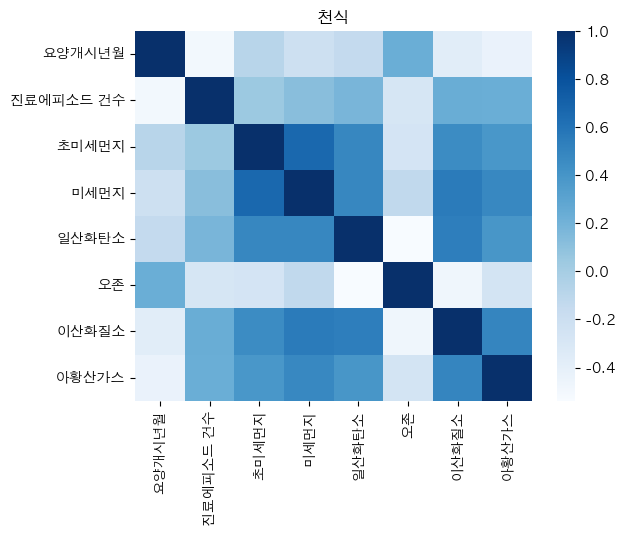

In [21]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False


# pandas의 ".corr"을 사용하여 상관계수 계산(numeric_only 인수를 명시하지 않았을 때 경고 메시지가 발생하여 numeric_only를 설정함.)
cor = df_1.corr(numeric_only=True)      
# seaborn heatmap을 사용하여 시각화(colormap = blue, 수치를 표시하지 않는 annot = false로 설정함.)  
sns.heatmap(cor, annot = False, cmap=plt.cm.Blues)  
plt.title('천식')
plt.show()

In [22]:
cor_target_abs1 = abs(cor['진료에피소드 건수']).sort_values(ascending=False)
print(cor_target_abs1)

진료에피소드 건수    1.000000
요양개시년월       0.500219
오존           0.282470
이산화질소        0.240346
아황산가스        0.233377
일산화탄소        0.180775
미세먼지         0.121889
초미세먼지        0.047054
Name: 진료에피소드 건수, dtype: float64


## 연령군 2

In [23]:
df_2 = 천식대기_df.query('연령군 == 2')
df_2

,요양개시년월,주소(시도),주소(시군구),연령군,진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
2,201001,서울특별시,강남구,2,75,26,63,0.8,0.008,0.050,0.007
8,201001,서울특별시,강동구,2,55,27,49,0.5,0.010,0.040,0.010
14,201001,서울특별시,강북구,2,34,22,54,0.9,0.015,0.049,0.010
20,201001,서울특별시,강서구,2,66,27,62,0.8,0.010,0.048,0.009
26,201001,서울특별시,관악구,2,35,19,64,0.9,0.009,0.044,0.006
...,...,...,...,...,...,...,...,...,...,...,...
21572,202112,서울특별시,용산구,2,12,23,38,0.5,0.012,0.029,0.003
21578,202112,서울특별시,은평구,2,50,23,36,0.7,0.013,0.027,0.004
21584,202112,서울특별시,종로구,2,15,25,39,0.6,0.014,0.031,0.003
21590,202112,서울특별시,중구,2,11,24,38,0.6,0.014,0.033,0.004


In [24]:
df_2 = df_2.drop(['연령군'], axis=1)

In [25]:
df_2

,요양개시년월,주소(시도),주소(시군구),진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
2,201001,서울특별시,강남구,75,26,63,0.8,0.008,0.050,0.007
8,201001,서울특별시,강동구,55,27,49,0.5,0.010,0.040,0.010
14,201001,서울특별시,강북구,34,22,54,0.9,0.015,0.049,0.010
20,201001,서울특별시,강서구,66,27,62,0.8,0.010,0.048,0.009
26,201001,서울특별시,관악구,35,19,64,0.9,0.009,0.044,0.006
...,...,...,...,...,...,...,...,...,...,...
21572,202112,서울특별시,용산구,12,23,38,0.5,0.012,0.029,0.003
21578,202112,서울특별시,은평구,50,23,36,0.7,0.013,0.027,0.004
21584,202112,서울특별시,종로구,15,25,39,0.6,0.014,0.031,0.003
21590,202112,서울특별시,중구,11,24,38,0.6,0.014,0.033,0.004


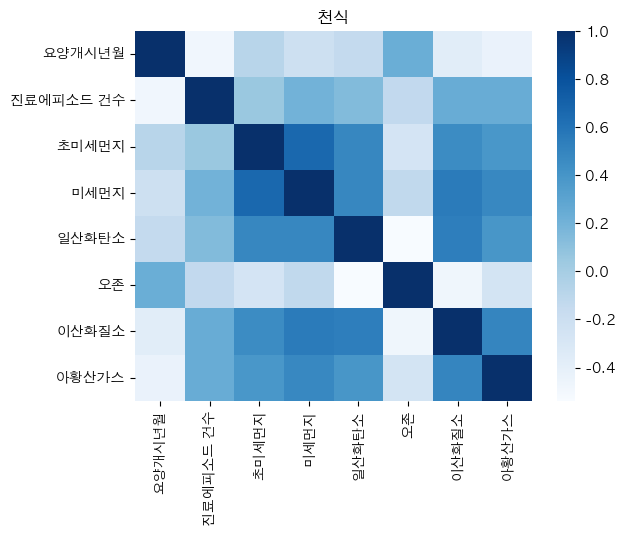

In [26]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False


# pandas의 ".corr"을 사용하여 상관계수 계산(numeric_only 인수를 명시하지 않았을 때 경고 메시지가 발생하여 numeric_only를 설정함.)
cor = df_2.corr(numeric_only=True)      
# seaborn heatmap을 사용하여 시각화(colormap = blue, 수치를 표시하지 않는 annot = false로 설정함.)  
sns.heatmap(cor, annot = False, cmap=plt.cm.Blues)  
plt.title('천식')
plt.show()

In [27]:
cor_target_abs2 = abs(cor['진료에피소드 건수']).sort_values(ascending=False)
print(cor_target_abs2)

진료에피소드 건수    1.000000
요양개시년월       0.479668
아황산가스        0.246236
이산화질소        0.243332
미세먼지         0.205149
일산화탄소        0.142283
오존           0.131264
초미세먼지        0.050826
Name: 진료에피소드 건수, dtype: float64


## 연령군 3

In [28]:
df_3 = 천식대기_df.query('연령군 == 3')
df_3

,요양개시년월,주소(시도),주소(시군구),연령군,진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
3,201001,서울특별시,강남구,3,491,26,63,0.8,0.008,0.050,0.007
9,201001,서울특별시,강동구,3,397,27,49,0.5,0.010,0.040,0.010
15,201001,서울특별시,강북구,3,229,22,54,0.9,0.015,0.049,0.010
21,201001,서울특별시,강서구,3,654,27,62,0.8,0.010,0.048,0.009
27,201001,서울특별시,관악구,3,487,19,64,0.9,0.009,0.044,0.006
...,...,...,...,...,...,...,...,...,...,...,...
21573,202112,서울특별시,용산구,3,109,23,38,0.5,0.012,0.029,0.003
21579,202112,서울특별시,은평구,3,281,23,36,0.7,0.013,0.027,0.004
21585,202112,서울특별시,종로구,3,65,25,39,0.6,0.014,0.031,0.003
21591,202112,서울특별시,중구,3,85,24,38,0.6,0.014,0.033,0.004


In [29]:
df_3 = df_3.drop(['연령군'], axis=1)

In [30]:
df_3

,요양개시년월,주소(시도),주소(시군구),진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
3,201001,서울특별시,강남구,491,26,63,0.8,0.008,0.050,0.007
9,201001,서울특별시,강동구,397,27,49,0.5,0.010,0.040,0.010
15,201001,서울특별시,강북구,229,22,54,0.9,0.015,0.049,0.010
21,201001,서울특별시,강서구,654,27,62,0.8,0.010,0.048,0.009
27,201001,서울특별시,관악구,487,19,64,0.9,0.009,0.044,0.006
...,...,...,...,...,...,...,...,...,...,...
21573,202112,서울특별시,용산구,109,23,38,0.5,0.012,0.029,0.003
21579,202112,서울특별시,은평구,281,23,36,0.7,0.013,0.027,0.004
21585,202112,서울특별시,종로구,65,25,39,0.6,0.014,0.031,0.003
21591,202112,서울특별시,중구,85,24,38,0.6,0.014,0.033,0.004


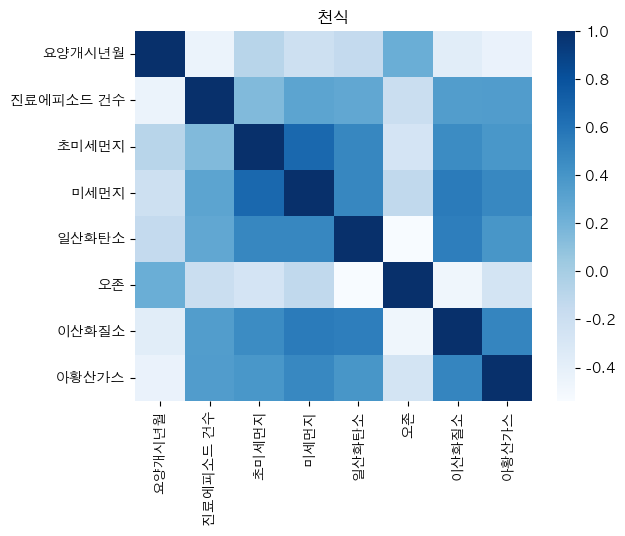

In [31]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False


# pandas의 ".corr"을 사용하여 상관계수 계산(numeric_only 인수를 명시하지 않았을 때 경고 메시지가 발생하여 numeric_only를 설정함.)
cor = df_3.corr(numeric_only=True)      
# seaborn heatmap을 사용하여 시각화(colormap = blue, 수치를 표시하지 않는 annot = false로 설정함.)  
sns.heatmap(cor, annot = False, cmap=plt.cm.Blues)  
plt.title('천식')
plt.show()

In [32]:
cor_target_abs3 = abs(cor['진료에피소드 건수']).sort_values(ascending=False)
print(cor_target_abs3)

진료에피소드 건수    1.000000
요양개시년월       0.442537
아황산가스        0.352434
이산화질소        0.345013
미세먼지         0.297065
일산화탄소        0.277529
오존           0.186128
초미세먼지        0.152182
Name: 진료에피소드 건수, dtype: float64


## 연령군 4

In [33]:
df_4 = 천식대기_df.query('연령군 == 4')
df_4

,요양개시년월,주소(시도),주소(시군구),연령군,진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
4,201001,서울특별시,강남구,4,438,26,63,0.8,0.008,0.050,0.007
10,201001,서울특별시,강동구,4,467,27,49,0.5,0.010,0.040,0.010
16,201001,서울특별시,강북구,4,278,22,54,0.9,0.015,0.049,0.010
22,201001,서울특별시,강서구,4,660,27,62,0.8,0.010,0.048,0.009
28,201001,서울특별시,관악구,4,425,19,64,0.9,0.009,0.044,0.006
...,...,...,...,...,...,...,...,...,...,...,...
21574,202112,서울특별시,용산구,4,105,23,38,0.5,0.012,0.029,0.003
21580,202112,서울특별시,은평구,4,301,23,36,0.7,0.013,0.027,0.004
21586,202112,서울특별시,종로구,4,73,25,39,0.6,0.014,0.031,0.003
21592,202112,서울특별시,중구,4,94,24,38,0.6,0.014,0.033,0.004


In [34]:
df_4 = df_4.drop(['연령군'], axis=1)

In [35]:
df_4

,요양개시년월,주소(시도),주소(시군구),진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
4,201001,서울특별시,강남구,438,26,63,0.8,0.008,0.050,0.007
10,201001,서울특별시,강동구,467,27,49,0.5,0.010,0.040,0.010
16,201001,서울특별시,강북구,278,22,54,0.9,0.015,0.049,0.010
22,201001,서울특별시,강서구,660,27,62,0.8,0.010,0.048,0.009
28,201001,서울특별시,관악구,425,19,64,0.9,0.009,0.044,0.006
...,...,...,...,...,...,...,...,...,...,...
21574,202112,서울특별시,용산구,105,23,38,0.5,0.012,0.029,0.003
21580,202112,서울특별시,은평구,301,23,36,0.7,0.013,0.027,0.004
21586,202112,서울특별시,종로구,73,25,39,0.6,0.014,0.031,0.003
21592,202112,서울특별시,중구,94,24,38,0.6,0.014,0.033,0.004


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 문자열이 포함된 특징('주소') 제외하기
df_no_object = df_4.drop(['주소(시도)', '주소(시군구)', '요양개시년월'], axis=1)

print(df_no_object)
# 데이터 분리 ('Life expectancy'를 제외한 특징들을 입력 변수로 정의함.) 
X_train, X_test, y_train, y_test = train_test_split(df_no_object.loc[:, df_no_object.columns !='진료에피소드 건수'], df_no_object['진료에피소드 건수'], test_size=.33, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 모델 예측
y_pred = model.predict(X_test)

# r2 score 계산
r2 = r2_score(y_test, y_pred)

# 결과 출력
print('r2 score :' + str(r2))

       진료에피소드 건수  초미세먼지  미세먼지  일산화탄소     오존  이산화질소  아황산가스
4            438     26    63    0.8  0.008  0.050  0.007
10           467     27    49    0.5  0.010  0.040  0.010
16           278     22    54    0.9  0.015  0.049  0.010
22           660     27    62    0.8  0.010  0.048  0.009
28           425     19    64    0.9  0.009  0.044  0.006
...          ...    ...   ...    ...    ...    ...    ...
21574        105     23    38    0.5  0.012  0.029  0.003
21580        301     23    36    0.7  0.013  0.027  0.004
21586         73     25    39    0.6  0.014  0.031  0.003
21592         94     24    38    0.6  0.014  0.033  0.004
21598        330     21    38    0.5  0.014  0.031  0.003

[3600 rows x 7 columns]
r2 score :0.2143494727288845


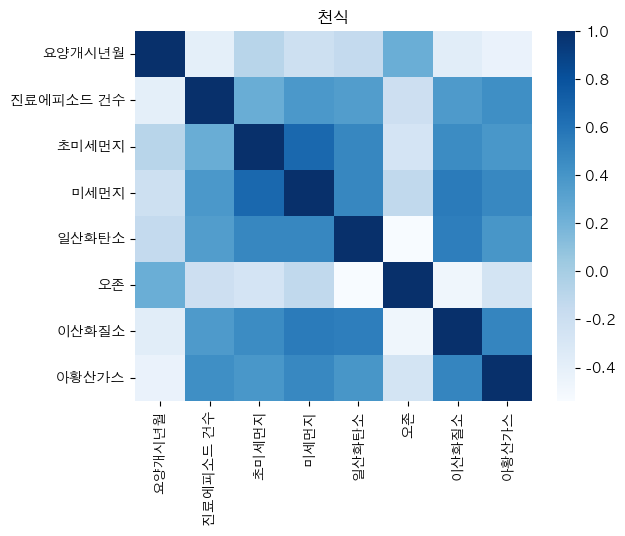

In [37]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False


# pandas의 ".corr"을 사용하여 상관계수 계산(numeric_only 인수를 명시하지 않았을 때 경고 메시지가 발생하여 numeric_only를 설정함.)
cor = df_4.corr(numeric_only=True)      
# seaborn heatmap을 사용하여 시각화(colormap = blue, 수치를 표시하지 않는 annot = false로 설정함.)  
sns.heatmap(cor, annot = False, cmap=plt.cm.Blues)  
plt.title('천식')
plt.show()

In [38]:
cor_target_abs4 = abs(cor['진료에피소드 건수']).sort_values(ascending=False)
print(cor_target_abs4)

진료에피소드 건수    1.000000
아황산가스        0.435307
요양개시년월       0.390166
미세먼지         0.375398
이산화질소        0.366932
일산화탄소        0.345830
초미세먼지        0.239752
오존           0.203863
Name: 진료에피소드 건수, dtype: float64


## 연령군 5

In [39]:
df_5 = 천식대기_df.query('연령군 == 5')
df_5

,요양개시년월,주소(시도),주소(시군구),연령군,진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
5,201001,서울특별시,강남구,5,275,26,63,0.8,0.008,0.050,0.007
11,201001,서울특별시,강동구,5,310,27,49,0.5,0.010,0.040,0.010
17,201001,서울특별시,강북구,5,198,22,54,0.9,0.015,0.049,0.010
23,201001,서울특별시,강서구,5,436,27,62,0.8,0.010,0.048,0.009
29,201001,서울특별시,관악구,5,345,19,64,0.9,0.009,0.044,0.006
...,...,...,...,...,...,...,...,...,...,...,...
21575,202112,서울특별시,용산구,5,108,23,38,0.5,0.012,0.029,0.003
21581,202112,서울특별시,은평구,5,350,23,36,0.7,0.013,0.027,0.004
21587,202112,서울특별시,종로구,5,69,25,39,0.6,0.014,0.031,0.003
21593,202112,서울특별시,중구,5,86,24,38,0.6,0.014,0.033,0.004


In [40]:
df_5 = df_5.drop(['연령군'], axis=1)

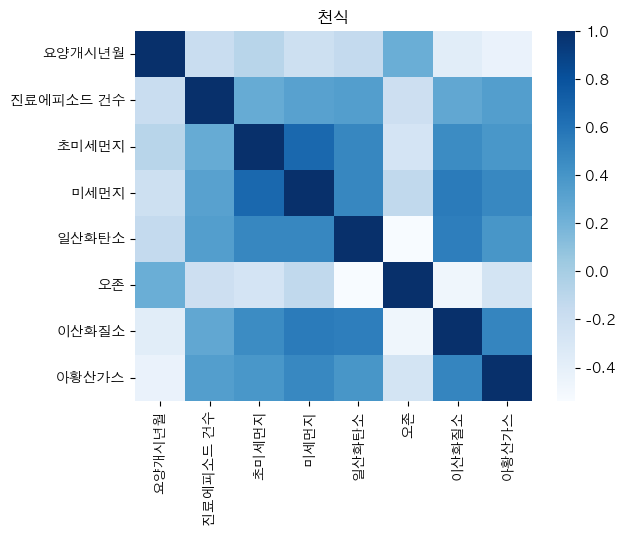

In [41]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# pandas의 ".corr"을 사용하여 상관계수 계산(numeric_only 인수를 명시하지 않았을 때 경고 메시지가 발생하여 numeric_only를 설정함.)
cor = df_5.corr(numeric_only=True)      
# seaborn heatmap을 사용하여 시각화(colormap = blue, 수치를 표시하지 않는 annot = false로 설정함.)  
sns.heatmap(cor, annot = False, cmap=plt.cm.Blues)  
plt.title('천식')
plt.show()

In [42]:
cor_target_abs5 = abs(cor['진료에피소드 건수']).sort_values(ascending=False)
print(cor_target_abs5)

진료에피소드 건수    1.000000
아황산가스        0.343726
일산화탄소        0.340764
미세먼지         0.316710
이산화질소        0.275661
초미세먼지        0.250175
오존           0.205286
요양개시년월       0.175909
Name: 진료에피소드 건수, dtype: float64


In [33]:
df_5 = 비염대기_df.query('연령군 == 5')
df_5

,요양개시년월,주소(시도),주소(시군구),연령군,진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
5,201001,서울특별시,강남구,5,1609,26,63,0.8,0.008,0.050,0.007
11,201001,서울특별시,강동구,5,1307,27,49,0.5,0.010,0.040,0.010
17,201001,서울특별시,강북구,5,869,22,54,0.9,0.015,0.049,0.010
23,201001,서울특별시,강서구,5,1687,27,62,0.8,0.010,0.048,0.009
29,201001,서울특별시,관악구,5,2023,19,64,0.9,0.009,0.044,0.006
...,...,...,...,...,...,...,...,...,...,...,...
21575,202112,서울특별시,관악구,5,2130,22,36,0.7,0.012,0.035,0.003
21581,202112,서울특별시,서초구,5,1260,23,36,0.5,0.015,0.031,0.003
21587,202112,서울특별시,강남구,5,1753,20,36,0.5,0.014,0.029,0.003
21593,202112,서울특별시,송파구,5,2659,22,38,0.6,0.012,0.034,0.004


In [34]:
df_5 = df_5.drop(['연령군'], axis=1)
df_5

,요양개시년월,주소(시도),주소(시군구),진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
5,201001,서울특별시,강남구,1609,26,63,0.8,0.008,0.050,0.007
11,201001,서울특별시,강동구,1307,27,49,0.5,0.010,0.040,0.010
17,201001,서울특별시,강북구,869,22,54,0.9,0.015,0.049,0.010
23,201001,서울특별시,강서구,1687,27,62,0.8,0.010,0.048,0.009
29,201001,서울특별시,관악구,2023,19,64,0.9,0.009,0.044,0.006
...,...,...,...,...,...,...,...,...,...,...
21575,202112,서울특별시,관악구,2130,22,36,0.7,0.012,0.035,0.003
21581,202112,서울특별시,서초구,1260,23,36,0.5,0.015,0.031,0.003
21587,202112,서울특별시,강남구,1753,20,36,0.5,0.014,0.029,0.003
21593,202112,서울특별시,송파구,2659,22,38,0.6,0.012,0.034,0.004


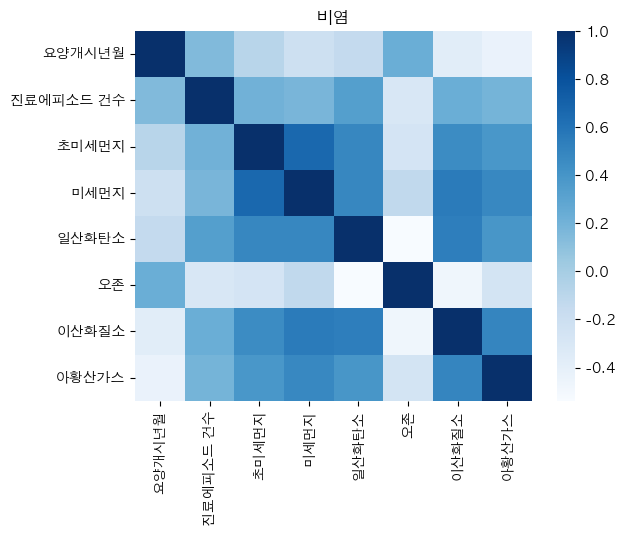

In [35]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# pandas의 ".corr"을 사용하여 상관계수 계산(numeric_only 인수를 명시하지 않았을 때 경고 메시지가 발생하여 numeric_only를 설정함.)
cor = df_5.corr(numeric_only=True)      
# seaborn heatmap을 사용하여 시각화(colormap = blue, 수치를 표시하지 않는 annot = false로 설정함.)  
sns.heatmap(cor, annot = False, cmap=plt.cm.Blues)  
plt.title('비염')
plt.show()

In [36]:
cor_target_abs5 = abs(cor['진료에피소드 건수']).sort_values(ascending=False)
print(cor_target_abs5)

진료에피소드 건수    1.000000
일산화탄소        0.334790
오존           0.297935
이산화질소        0.233068
초미세먼지        0.211266
아황산가스        0.192263
미세먼지         0.182405
요양개시년월       0.152388
Name: 진료에피소드 건수, dtype: float64


In [ ]:
연령군 4
df_4 = 비염대기_df.query('연령군 == 4')
df_4
df_4 = df_4.drop(['연령군'], axis=1)
df_4
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# pandas의 ".corr"을 사용하여 상관계수 계산(numeric_only 인수를 명시하지 않았을 때 경고 메시지가 발생하여 numeric_only를 설정함.)
cor = df_4.corr(numeric_only=True)      
# seaborn heatmap을 사용하여 시각화(colormap = blue, 수치를 표시하지 않는 annot = false로 설정함.)  
sns.heatmap(cor, annot = False, cmap=plt.cm.Blues)  
plt.title('비염')
plt.show()
cor_target_abs4 = abs(cor['진료에피소드 건수']).sort_values(ascending=False)
print(cor_target_abs4)
cor_target_abs4 = abs(cor['진료에피소드 건수']).sort_values(ascending=False)
print(cor_target_abs4)

In [10]:
!pip install -U scikit-learn

In [12]:
pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 2.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 2.2 MB/s eta 0:00:00a 0:00:01
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
Note: you may need to restart the kernel to use updated packages.


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 문자열이 포함된 특징('주소') 제외하기
df_no_object = 비염대기_df.drop(['주소(시도)', '주소(시군구)'], axis=1)

# 데이터 분리 ('Life expectancy'를 제외한 특징들을 입력 변수로 정의함.) 
X_train, X_test, y_train, y_test = train_test_split(df_no_object.loc[:, df_no_object.columns !='진료에피소드 건수'], df_no_object['진료에피소드 건수'], test_size=.33, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 모델 예측
y_pred = model.predict(X_test)

# r2 score 계산
r2 = r2_score(y_test, y_pred)

# 결과 출력
print('r2 score :' + str(r2))

r2 score :0.1045382317828657


In [20]:
index = 비염대기_df[비염대기_df['요양개시년월'] >= 202001].index

In [21]:
print(index)

Index([18000, 18001, 18002, 18003, 18004, 18005, 18006, 18007, 18008, 18009,
       ...
       21590, 21591, 21592, 21593, 21594, 21595, 21596, 21597, 21598, 21599],
      dtype='int64', length=3600)


In [22]:
df_2019 = 비염대기_df.drop(index)

In [23]:
df_2019

,요양개시년월,주소(시도),주소(시군구),연령군,진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
0,201001,서울특별시,강남구,0,1195,26,63,0.8,0.008,0.050,0.007
1,201001,서울특별시,강남구,1,1252,26,63,0.8,0.008,0.050,0.007
2,201001,서울특별시,강남구,2,1382,26,63,0.8,0.008,0.050,0.007
3,201001,서울특별시,강남구,3,8087,26,63,0.8,0.008,0.050,0.007
4,201001,서울특별시,강남구,4,4761,26,63,0.8,0.008,0.050,0.007
...,...,...,...,...,...,...,...,...,...,...,...
17995,201912,서울특별시,강동구,1,2035,36,48,0.6,0.009,0.036,0.003
17996,201912,서울특별시,강동구,2,1632,36,48,0.6,0.009,0.036,0.003
17997,201912,서울특별시,강동구,3,7962,36,48,0.6,0.009,0.036,0.003
17998,201912,서울특별시,강동구,4,5905,36,48,0.6,0.009,0.036,0.003


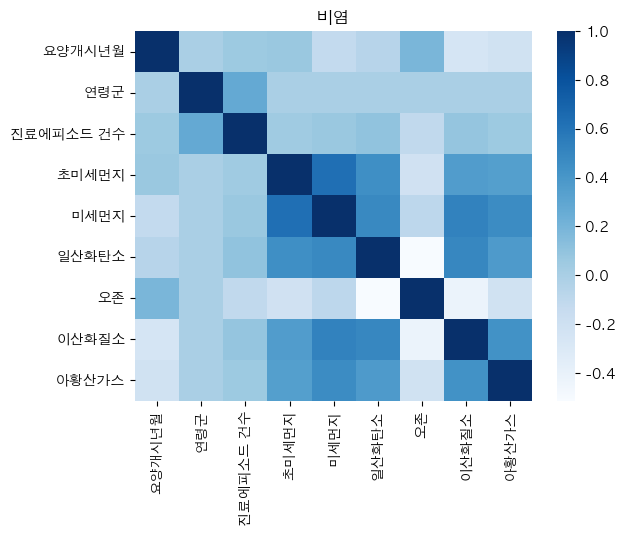

In [26]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# pandas의 ".corr"을 사용하여 상관계수 계산(numeric_only 인수를 명시하지 않았을 때 경고 메시지가 발생하여 numeric_only를 설정함.)
cor = df_2019.corr(numeric_only=True)      
# seaborn heatmap을 사용하여 시각화(colormap = blue, 수치를 표시하지 않는 annot = false로 설정함.)  
sns.heatmap(cor, annot = False, cmap=plt.cm.Blues)  
plt.title('비염')
plt.show()

In [27]:
cor_target_abs2 = abs(cor['진료에피소드 건수']).sort_values(ascending=False)
print(cor_target_abs2)

진료에피소드 건수    1.000000
연령군          0.278278
오존           0.107929
일산화탄소        0.105433
이산화질소        0.083503
미세먼지         0.070112
아황산가스        0.058304
요양개시년월       0.057831
초미세먼지        0.044626
Name: 진료에피소드 건수, dtype: float64


In [28]:
비염대기_df

,요양개시년월,주소(시도),주소(시군구),연령군,진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
0,201001,서울특별시,강남구,0,1195,26,63,0.8,0.008,0.05,0.007
1,201001,서울특별시,강남구,1,1252,26,63,0.8,0.008,0.05,0.007
2,201001,서울특별시,강남구,2,1382,26,63,0.8,0.008,0.05,0.007
3,201001,서울특별시,강남구,3,8087,26,63,0.8,0.008,0.05,0.007
4,201001,서울특별시,강남구,4,4761,26,63,0.8,0.008,0.05,0.007
...,...,...,...,...,...,...,...,...,...,...,...
21595,202112,서울특별시,강동구,1,1315,24,42,0.5,0.011,0.03,0.003
21596,202112,서울특별시,강동구,2,730,24,42,0.5,0.011,0.03,0.003
21597,202112,서울특별시,강동구,3,3964,24,42,0.5,0.011,0.03,0.003
21598,202112,서울특별시,강동구,4,2822,24,42,0.5,0.011,0.03,0.003


In [29]:
cols = ['요양개시년월', '주소(시도)', '주소(시군구)', '연령군', '진료에피소드 건수', '초미세먼지', '미세먼지', '일산화탄소', '오존', '이산화질소', '아황산가스']

In [41]:
cols = ['요양개시년월','연령군', '진료에피소드 건수', '초미세먼지', '미세먼지', '일산화탄소', '오존', '이산화질소', '아황산가스']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

비염대기_df[cols] = scaler.fit_transform(비염대기_df[cols])
# print(out_scaled)

비염대기_df

,요양개시년월,주소(시도),주소(시군구),연령군,진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
0,0.0,서울특별시,강남구,0.0,0.076734,0.42,0.213115,0.636364,0.0625,0.836364,0.6
1,0.0,서울특별시,강남구,0.2,0.080518,0.42,0.213115,0.636364,0.0625,0.836364,0.6
2,0.0,서울특별시,강남구,0.4,0.089147,0.42,0.213115,0.636364,0.0625,0.836364,0.6
3,0.0,서울특별시,강남구,0.6,0.534218,0.42,0.213115,0.636364,0.0625,0.836364,0.6
4,0.0,서울특별시,강남구,0.8,0.313442,0.42,0.213115,0.636364,0.0625,0.836364,0.6
...,...,...,...,...,...,...,...,...,...,...,...
21595,1.0,서울특별시,강동구,0.2,0.084700,0.38,0.127049,0.363636,0.1250,0.472727,0.2
21596,1.0,서울특별시,강동구,0.4,0.045868,0.38,0.127049,0.363636,0.1250,0.472727,0.2
21597,1.0,서울특별시,강동구,0.6,0.260538,0.38,0.127049,0.363636,0.1250,0.472727,0.2
21598,1.0,서울특별시,강동구,0.8,0.184733,0.38,0.127049,0.363636,0.1250,0.472727,0.2


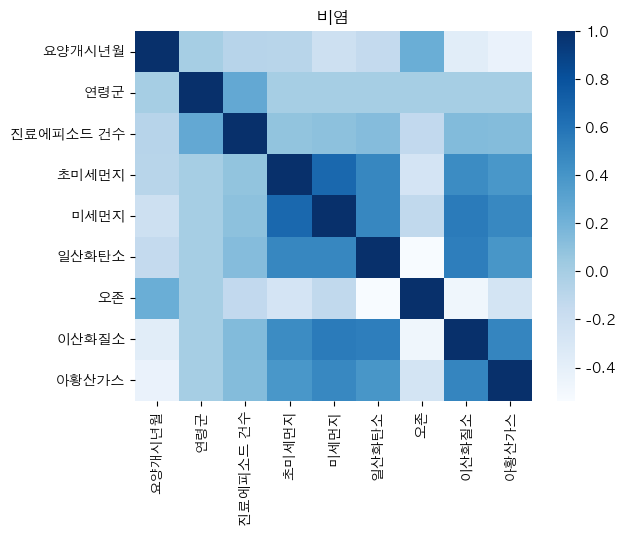

In [42]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# pandas의 ".corr"을 사용하여 상관계수 계산(numeric_only 인수를 명시하지 않았을 때 경고 메시지가 발생하여 numeric_only를 설정함.)
cor = 비염대기_df.corr(numeric_only=True)      
# seaborn heatmap을 사용하여 시각화(colormap = blue, 수치를 표시하지 않는 annot = false로 설정함.)  
sns.heatmap(cor, annot = False, cmap=plt.cm.Blues)  
plt.title('비염')
plt.show()

In [40]:
비염대기_df

,요양개시년월,주소(시도),주소(시군구),연령군,진료에피소드 건수,초미세먼지,미세먼지,일산화탄소,오존,이산화질소,아황산가스
0,0.0,서울특별시,강남구,0.0,0.076734,0.42,0.213115,0.636364,0.0625,0.836364,0.6
1,0.0,서울특별시,강남구,0.2,0.080518,0.42,0.213115,0.636364,0.0625,0.836364,0.6
2,0.0,서울특별시,강남구,0.4,0.089147,0.42,0.213115,0.636364,0.0625,0.836364,0.6
3,0.0,서울특별시,강남구,0.6,0.534218,0.42,0.213115,0.636364,0.0625,0.836364,0.6
4,0.0,서울특별시,강남구,0.8,0.313442,0.42,0.213115,0.636364,0.0625,0.836364,0.6
...,...,...,...,...,...,...,...,...,...,...,...
21595,1.0,서울특별시,강동구,0.2,0.084700,0.38,0.127049,0.363636,0.1250,0.472727,0.2
21596,1.0,서울특별시,강동구,0.4,0.045868,0.38,0.127049,0.363636,0.1250,0.472727,0.2
21597,1.0,서울특별시,강동구,0.6,0.260538,0.38,0.127049,0.363636,0.1250,0.472727,0.2
21598,1.0,서울특별시,강동구,0.8,0.184733,0.38,0.127049,0.363636,0.1250,0.472727,0.2


In [43]:
cor_target_abs2 = abs(cor['진료에피소드 건수']).sort_values(ascending=False)
print(cor_target_abs2)

진료에피소드 건수    1.000000
연령군          0.268376
이산화질소        0.141139
아황산가스        0.134937
일산화탄소        0.133359
오존           0.132103
미세먼지         0.102924
초미세먼지        0.081176
요양개시년월       0.079347
Name: 진료에피소드 건수, dtype: float64


In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 문자열이 포함된 특징('주소') 제외하기
df_no_object = 비염대기_df.drop(['주소(시도)', '주소(시군구)'], axis=1)

print(비염대기_df)

# 데이터 분리 ('Life expectancy'를 제외한 특징들을 입력 변수로 정의함.) 
X_train, X_test, y_train, y_test = train_test_split(df_no_object.loc[:, df_no_object.columns !='진료에피소드 건수'], df_no_object['진료에피소드 건수'], test_size=.33, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 모델 예측
y_pred = model.predict(X_test)

# r2 score 계산
r2 = r2_score(y_test, y_pred)

# 결과 출력
print('r2 score :' + str(r2))

       요양개시년월 주소(시도) 주소(시군구)  연령군  진료에피소드 건수  초미세먼지      미세먼지     일산화탄소   
0         0.0  서울특별시     강남구  0.0   0.076734   0.42  0.213115  0.636364  \
1         0.0  서울특별시     강남구  0.2   0.080518   0.42  0.213115  0.636364   
2         0.0  서울특별시     강남구  0.4   0.089147   0.42  0.213115  0.636364   
3         0.0  서울특별시     강남구  0.6   0.534218   0.42  0.213115  0.636364   
4         0.0  서울특별시     강남구  0.8   0.313442   0.42  0.213115  0.636364   
...       ...    ...     ...  ...        ...    ...       ...       ...   
21595     1.0  서울특별시     강동구  0.2   0.084700   0.38  0.127049  0.363636   
21596     1.0  서울특별시     강동구  0.4   0.045868   0.38  0.127049  0.363636   
21597     1.0  서울특별시     강동구  0.6   0.260538   0.38  0.127049  0.363636   
21598     1.0  서울특별시     강동구  0.8   0.184733   0.38  0.127049  0.363636   
21599     1.0  서울특별시     강동구  1.0   0.120345   0.38  0.127049  0.363636   

           오존     이산화질소  아황산가스  
0      0.0625  0.836364    0.6  
1      0.0625  0.836364    0.6  
